# Exploring Layer Effects in CNNs
Objective: Understand the impact of varying parameters in convolutional and pooling layers on image processing.

## Setup


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import img_to_array, load_img

2023-12-11 20:34:05.046713: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load and prepare data
path = "material/voxel.png" # replace with your own image if you want (remove or edit rotatio to fit new pic).
img = Image.open(path).convert('L').resize((150,150)) 
image_array = tf.keras.utils.img_to_array(img) # Convert to tensor
image_array = tf.expand_dims(image_array, 0)  # Create a batch

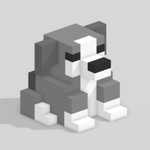

In [15]:
img

## Exercise 
Let's create a function to build and visualize CNN Layers. Read through the code below and make sure you understand it.

1/1 [==============================] - 0s 56ms/step


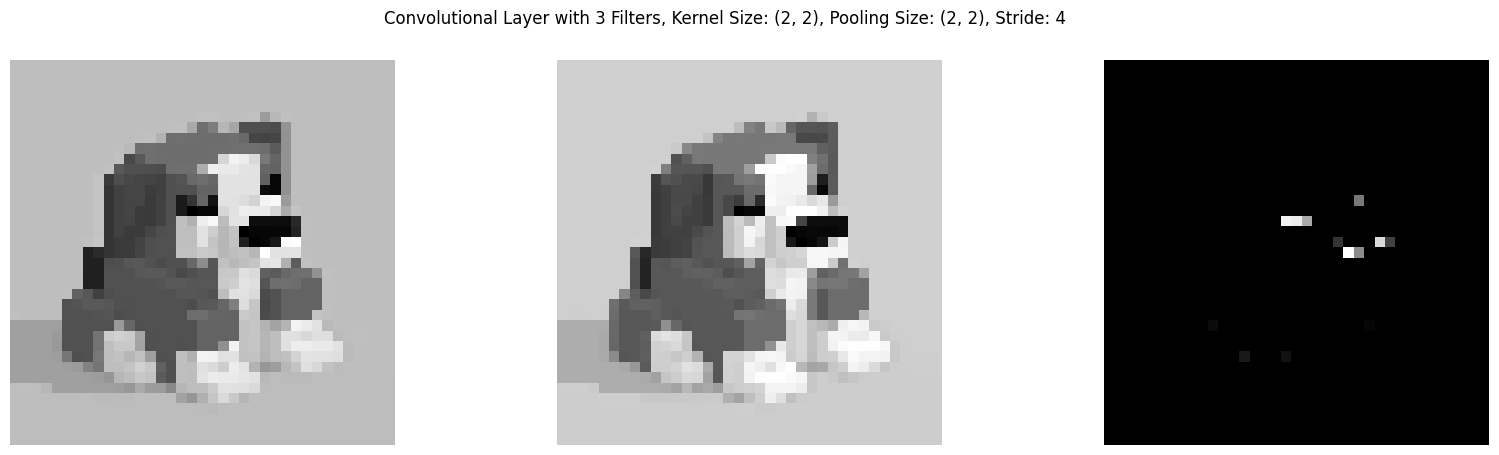

Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 150, 150, 1)]     0         
                                                                 
 conv2d_36 (Conv2D)          (None, 149, 149, 3)       15        
                                                                 
 max_pooling2d_36 (MaxPooli  (None, 37, 37, 3)         0         
 ng2D)                                                           
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [31]:
def build_and_visualize_cnn(filters, kernel_size, pooling_size, stride):
    inputs = Input(shape=(150, 150, 1))
    x = Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')(inputs)
    x = MaxPooling2D(pool_size=pooling_size, strides=stride)(x)
    
    model = Model(inputs=inputs, outputs=x)

    feature_maps = model.predict(image_array)
    fm = feature_maps[0]

    fig, ax = plt.subplots(1, filters, figsize=(20, 5))
    for i in range(filters):
        ax[i].imshow(fm[:, :, i], cmap='gray')
        ax[i].axis('off')
    plt.suptitle(f'Convolutional Layer with {filters} Filters, Kernel Size: {kernel_size}, '
                 f'Pooling Size: {pooling_size}, Stride: {stride}')
    plt.show()
    print(model.summary())


build_and_visualize_cnn(filters=3, kernel_size=(2, 2), pooling_size=(2, 2), stride=4)


What happens if you...

1. Run the above cell several times in a row?
    * Why does the output change?
        >**No set seed on the initial randomized weights.**
        
    * How could you avoid that?
        >**Set a random seed**

    * Why do we sometimes want to avoid this?
        >**Compare results, track changes and improvements**

2. Change number of filters?
    >**More filters allow the layers to capture more complex features**

3. Increase the stride? Why?
    >**Reduces spatial dimensions of output feature maps**

4. Increase the pooling size? Why?
    >**Larger pooling sizes == more downsampling**

5. Change the kernel size?
    >**Larger kernel sizes capture larger patterns, but they also increase the number of parameters and computation. Smaller kernel sizes focus on smaller patterns and can capture more intricate details.**

## Bonus exercise:
What happens if you make the network deeper? How does the output feature maps change? Edit the network above to add another layer and experiment with the hyperparameters.

1/1 [==============================] - 0s 88ms/step


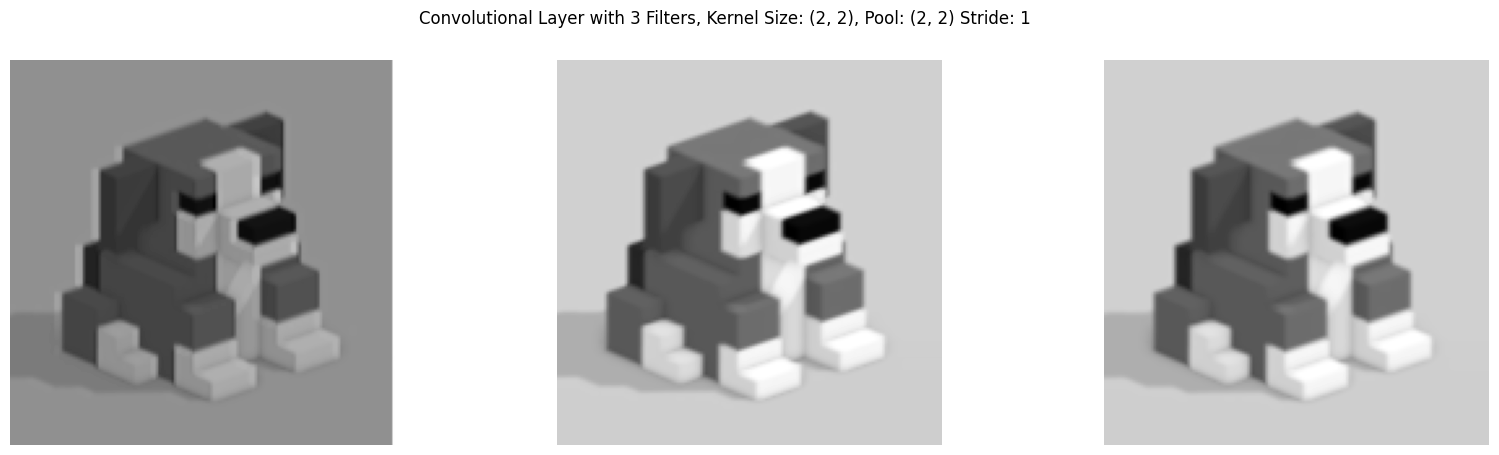

Model: "model_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_78 (InputLayer)       [(None, 150, 150, 1)]     0         
                                                                 
 conv2d_134 (Conv2D)         (None, 149, 149, 3)       15        
                                                                 
 conv2d_135 (Conv2D)         (None, 149, 149, 9)       117       
                                                                 
 max_pooling2d_135 (MaxPool  (None, 148, 148, 9)       0         
 ing2D)                                                          
                                                                 
Total params: 132 (528.00 Byte)
Trainable params: 132 (528.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [86]:
import keras
keras.utils.set_random_seed(42)

def build_and_visualize_cnn_2(filters, pool_size=(2,2), kernel_size=(2,2), stride=1, model_summary=False):
    inputs = Input(shape=(150, 150, 1))
    layer1 = Conv2D(filters=filters, kernel_size=kernel_size, activation='relu')(inputs)
    x = MaxPooling2D(pool_size=pool_size, strides=stride)(layer1)
    
    layer2 = Conv2D(filters=filters*3, kernel_size=kernel_size, activation='relu', padding='same')(layer1)
    x = MaxPooling2D(pool_size=pool_size, strides=stride)(layer2)
    

    model = Model(inputs=inputs, outputs=x)

    feature_maps = model.predict(image_array)
    fm = feature_maps[0]

    fig, ax = plt.subplots(1, filters, figsize=(20, 5))
    for i in range(filters):
        ax[i].imshow(fm[:, :, i], cmap='gray')
        ax[i].axis('off')
    plt.suptitle(f'Convolutional Layer with {filters} Filters, Kernel Size: {kernel_size}, '
                 f'Pool: {pool_size} Stride: {stride}')
    plt.show()

    if model_summary:
        print(model.summary())


build_and_visualize_cnn_2(filters=3, kernel_size=(2, 2), stride=1, model_summary=True)

### Large kernel size (32,32) capture lots of noise.

1/1 [==============================] - 0s 89ms/step


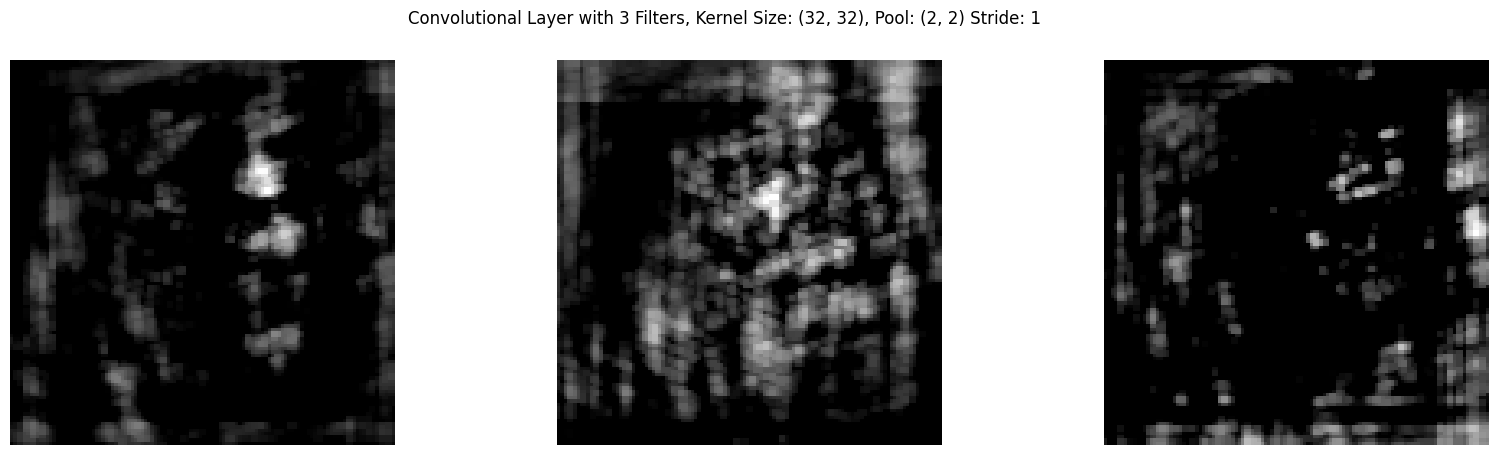

In [87]:
build_and_visualize_cnn_2(filters=3, kernel_size=(32, 32), stride=1)

### Large pooling size (9,9) downsamples the data and smudges the image shapes

1/1 [==============================] - 0s 85ms/step


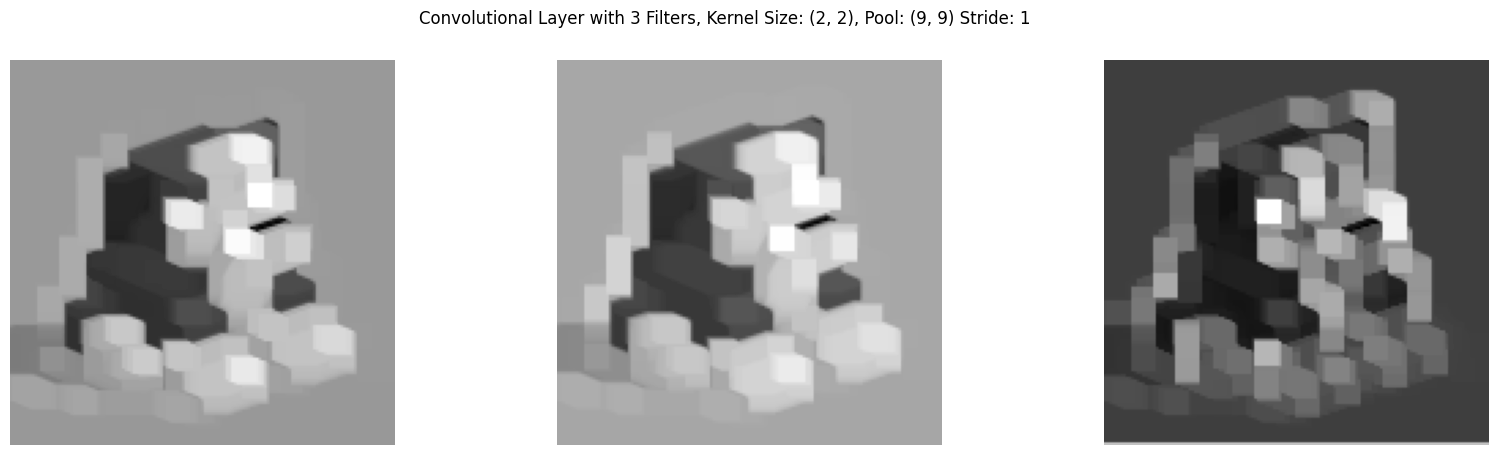

In [88]:
build_and_visualize_cnn_2(filters=3, pool_size=(9,9))

### Increased params

1/1 [==============================] - 0s 78ms/step


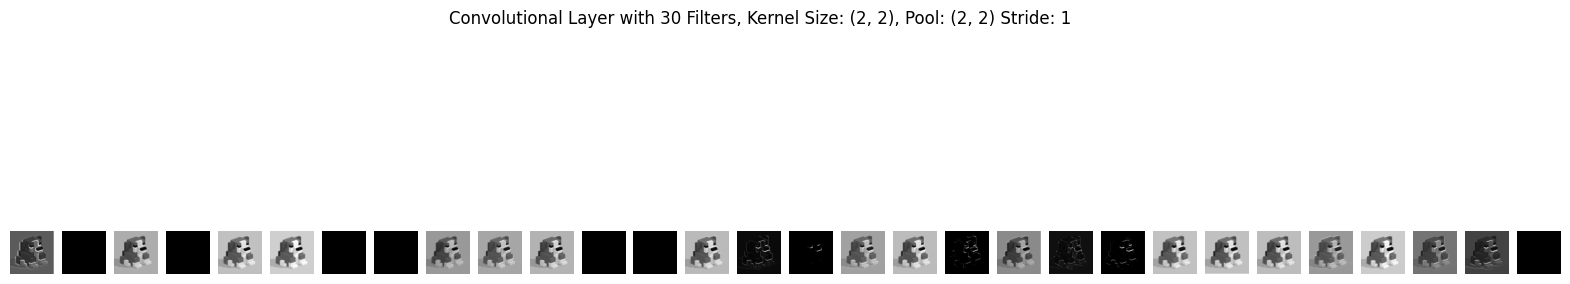

Model: "model_80"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_82 (InputLayer)       [(None, 150, 150, 1)]     0         
                                                                 
 conv2d_142 (Conv2D)         (None, 149, 149, 30)      150       
                                                                 
 conv2d_143 (Conv2D)         (None, 149, 149, 90)      10890     
                                                                 
 max_pooling2d_143 (MaxPool  (None, 148, 148, 90)      0         
 ing2D)                                                          
                                                                 
Total params: 11040 (43.12 KB)
Trainable params: 11040 (43.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [90]:
build_and_visualize_cnn_2(filters=30, model_summary=True)